# Analysis of Reese's Book Club picks, June 2017 - November 2023

## Import dataset

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [2]:
df = pd.read_csv('RBCDatabase.csv')
df = df.drop('Unnamed: 9', axis=1)
df = df.drop('Unnamed: 10', axis=1)

In [3]:
df.head()

,Month of Selection,Year of Selection,Book Title,Author Name,Publication date,Genre,Adaptation?,Goodreads Summary,# of pages
0,June,2017,Eleanor Oliphant is Completely Fine,Gail Honeyman,2017,Literary Fiction,Planned,No one’s ever told Eleanor that life should be...,390
1,July,2017,The Alice Network,Kate Quinn,2017,Historical Fiction,No,In an enthralling new historical novel from na...,503
2,August,2017,The Lying Game,Ruth Ware,2017,Thriller,No,From the instant New York Times bestselling au...,370
3,September,2017,Little Fires Everywhere,Celeste Ng,2017,Literary Fiction,Yes,Everyone in Shaker Heights was talking about i...,338
4,October,2017,The Rules of Magic,Alice Hoffman,2017,Fantasy,No,"Find your magic\n\nFor the Owens family, love ...",369


# Genre Analysis

In [4]:
genre_counts = df['Genre'].value_counts()

In [5]:
print(genre_counts)

Historical Fiction    18
Thriller              16
Romance               10
Literary Fiction       9
Memoir                 5
Magical Realism        4
Mystery                4
Self-Help              4
Fantasy                2
Short Stories          2
Chick Lit              1
Young Adult            1
Dystopia               1
History                1
Name: Genre, dtype: int64


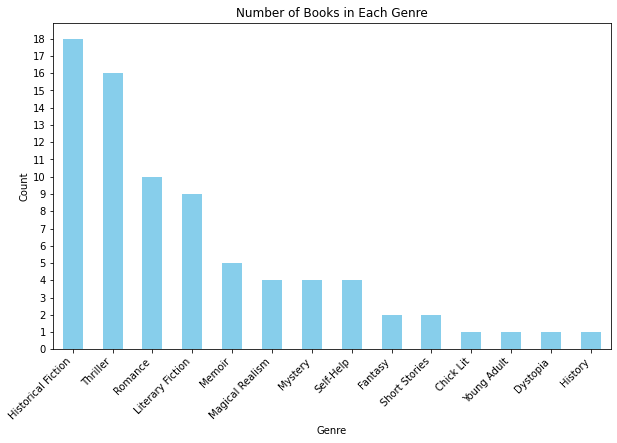

In [7]:
# Plotting using matplotlib
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Books in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Set y-axis ticks to integer values
plt.yticks(range(0, int(max(genre_counts)) + 1))

plt.show()

# Book Length

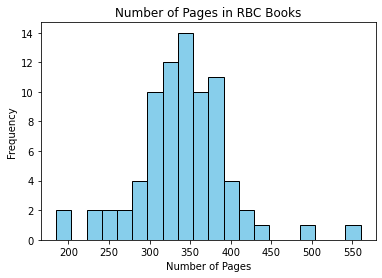

In [15]:
# Plotting the histogram
plt.hist(df['# of pages'], bins=20, color='skyblue', edgecolor='black')
plt.title('Number of Pages in RBC Books')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.show()

In [14]:
import numpy as np

# Assuming 'df' is your DataFrame and 'Number_of_Pages' is the column containing the number of pages
mean_pages = np.mean(df['# of pages'])
median_pages = np.median(df['# of pages'])
std_dev_pages = np.std(df['# of pages'])

print(f"Mean: {mean_pages:.2f}")
print(f"Median: {median_pages}")
print(f"Standard Deviation: {std_dev_pages:.2f}")

Mean: 340.44
Median: 336.0
Standard Deviation: 57.22


# Author Identity

https://pypi.org/project/ethnicseer/#:~:text=ethnicseer%20(%27ethnic%2Dseer%27),name%20and%20its%20phonetic%20pronounciation.

ethnicseer comes with a pre-trained model, which can handle the following 12 ethnicities: Middle-Eastern, Chinese, English, French, Vietnam, Spanish, Italian, German, Japanese, Russian, Indian, and Korean. The included pre-trained model can achieve around 84% accuracy on the test data set.

In [4]:
from ethnicseer import EthnicClassifier
ec = EthnicClassifier.load_pretrained_model()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [9]:
ethnicities = []
for index, row in df.iterrows():
    ethnicities.append(ec.classify_names({row["Author Name"]})[0])
print(ethnicities)

['eng', 'eng', 'eng', 'chi', 'chi', 'eng', 'ita', 'frn', 'chi', 'ind', 'eng', 'eng', 'eng', 'eng', 'ger', 'eng', 'eng', 'eng', 'eng', 'eng', 'eng', 'eng', 'chi', 'chi', 'eng', 'eng', 'eng', 'eng', 'eng', 'spa', 'frn', 'eng', 'ger', 'eng', 'eng', 'ind', 'eng', 'eng', 'eng', 'kor', 'eng', 'eng', 'ita', 'eng', 'eng', 'ger', 'eng', 'eng', 'eng', 'eng', 'ger', 'spa', 'jap', 'mea', 'ger', 'ind', 'frn', 'eng', 'ita', 'eng', 'chi', 'spa', 'eng', 'eng', 'chi', 'eng', 'eng', 'spa', 'eng', 'eng', 'eng', 'ind', 'eng', 'chi', 'eng', 'eng', 'eng', 'ger']


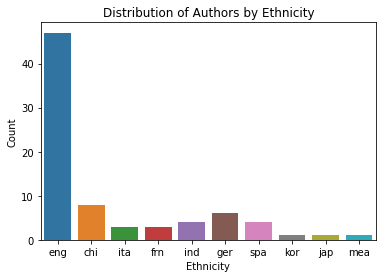

In [11]:
import seaborn as sns

eths = pd.DataFrame({'ethnicity': ethnicities})

# Plotting a bar chart
sns.countplot(x='ethnicity', data=eths)
plt.title('Distribution of Authors by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

# Temporal Discrepency

In [17]:
# Add a new column 'Time Difference' by subtracting 'Year of Selection' from 'Publication date'
df['Time Difference'] = df['Year of Selection'] - df['Publication date']

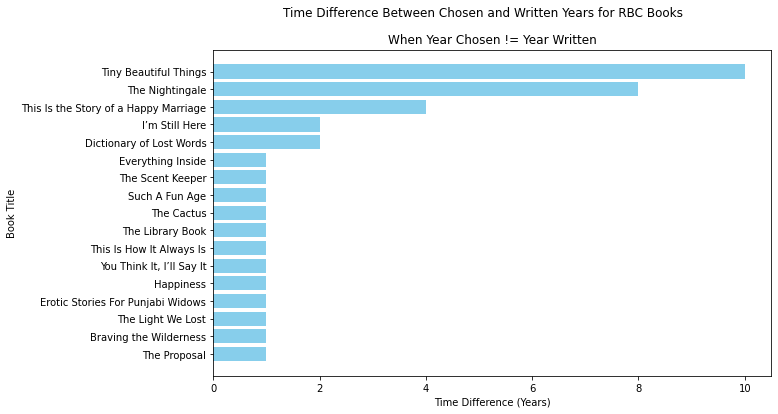

In [30]:
# Filter the DataFrame for books with Time_Difference > 0
filtered_df = df[df['Time Difference'] > 0]
filtered_df = filtered_df.sort_values(by='Time Difference')

# Create a horizontal bar chart displaying only the titles
plt.figure(figsize=(10, 6))
plt.barh(filtered_df['Book Title'], filtered_df['Time Difference'], color='skyblue')
plt.ylabel('Book Title')
plt.xlabel('Time Difference (Years)')
plt.suptitle('Time Difference Between Chosen and Written Years for RBC Books')
plt.title('When Year Chosen != Year Written')
plt.show()

# Adaptations

In [31]:
# Print book titles having adaptations
filtered_titles = df.loc[df['Adaptation?'] != 'No', 'Book Title']
for title in filtered_titles:
    print(title)

Eleanor Oliphant is Completely Fine
Little Fires Everywhere
Where the Crawdads Sing
Daisy Jones & The Six
From Scratch
The Last Thing He Told Me
Tiny Beautiful Things
Mother-Daughter Murder Night


# Topic Modelling

## Word Cloud

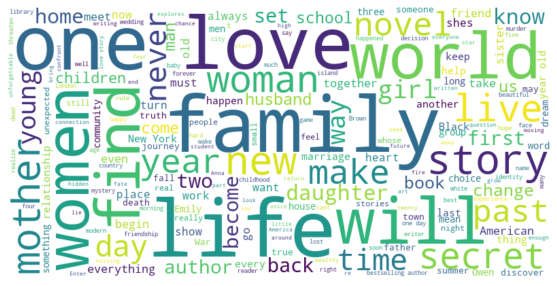

In [40]:
# Create exploratory word cloud of the book Goodread's descriptions
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['Goodreads Summary']).replace("'", "")

# Set stopwords
custom_stopwords = set(["s", "rt", "u"])
all_stopwords = set(STOPWORDS) | custom_stopwords

# Generate the word cloud
wordcloud = WordCloud(stopwords=all_stopwords, width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

## Perform Topic Modelling

In [41]:
from gensim.parsing.preprocessing import preprocess_string

# Tokenize and preprocess the text
df['processed_text'] = df['Goodreads Summary'].apply(lambda x: preprocess_string(x))

In [42]:
from gensim import corpora

# Create a dictionary
dictionary = corpora.Dictionary(df['processed_text'])

# Create a corpus
corpus = [dictionary.doc2bow(text) for text in df['processed_text']]

In [50]:
from gensim.models import LdaModel

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=30)

In [51]:
# Print the topics and associated words
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.008*"love" + 0.007*"famili" + 0.006*"new" + 0.005*"life" + 0.005*"live"')
(1, '0.007*"famili" + 0.006*"women" + 0.005*"secret" + 0.005*"life" + 0.004*"year"')
(2, '0.008*"love" + 0.007*"life" + 0.006*"stori" + 0.005*"famili" + 0.004*"year"')


# Cosine Similarity

In [4]:
# Gather summaries and corpus
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

summaries = df['Goodreads Summary'].tolist()

corpus = summaries

In [5]:
# Combine all texts into one list for vectorization
all_texts = summaries + corpus

# Use TF-IDF Vectorizer to convert text to numerical features
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_texts)

# Calculate cosine similarity between each summary and the entire corpus
similarity_scores = cosine_similarity(tfidf_matrix[:len(summaries)], tfidf_matrix[len(summaries):])

In [10]:
# Set Cosine Similarity column
df['Cosine Similarity'] = (similarity_scores.mean(axis=1)).tolist()
df.head()

,Month of Selection,Year of Selection,Book Title,Author Name,Publication date,Genre,Adaptation?,Goodreads Summary,# of pages,Cosine Similarity
0,June,2017,Eleanor Oliphant is Completely Fine,Gail Honeyman,2017,Literary Fiction,Planned,No one’s ever told Eleanor that life should be...,390,0.069777
1,July,2017,The Alice Network,Kate Quinn,2017,Historical Fiction,No,In an enthralling new historical novel from na...,503,0.156874
2,August,2017,The Lying Game,Ruth Ware,2017,Thriller,No,From the instant New York Times bestselling au...,370,0.182237
3,September,2017,Little Fires Everywhere,Celeste Ng,2017,Literary Fiction,Yes,Everyone in Shaker Heights was talking about i...,338,0.152514
4,October,2017,The Rules of Magic,Alice Hoffman,2017,Fantasy,No,"Find your magic\n\nFor the Owens family, love ...",369,0.158882


In [12]:
df_sorted = df.sort_values(by='Cosine Similarity', ascending=False)

df_sorted.head()

,Month of Selection,Year of Selection,Book Title,Author Name,Publication date,Genre,Adaptation?,Goodreads Summary,# of pages,Cosine Similarity
19,January,2019,The Library Book,Susan Orlean,2018,History,No,"On the morning of April 29, 1986, a fire alarm...",317,0.192610
77,November,2023,Maybe Next Time,Cesca Major,2023,Magical Realism,No,"One Day meets Groundhog Day, in this heartwarm...",384,0.184341
66,December,2022,The Marriage Portrait,Maggie O'Farrell,2022,Historical Fiction,No,The author of award-winning Hamnet brings the ...,335,0.182978
2,August,2017,The Lying Game,Ruth Ware,2017,Thriller,No,From the instant New York Times bestselling au...,370,0.182237
15,September,2018,Where the Crawdads Sing,Delia Owens,2018,Historical Fiction,Yes,"For years, rumors of the “Marsh Girl” haunted ...",384,0.181602


### Top 5 most representative books (based on how similar their Goodreads summary is to the corpus of all summaries)

1. The Library Book by Susan Orlean
2. Maybe Next Time by Cesca Major
3. The Marriage Portrait by Maggie O'Farrel
4. The Lying Game by Ruth Ware
5. Where the Crawdads Sing by Delia Owens

In [13]:
# Least similar
df_sorted.tail()

,Month of Selection,Year of Selection,Book Title,Author Name,Publication date,Genre,Adaptation?,Goodreads Summary,# of pages,Cosine Similarity
17,November,2018,The Other Woman,Sandie Jones,2018,Thriller,No,"A deliciously disturbing, compulsively readabl...",304,0.108546
47,May,2021,The Last Thing He Told Me,Laura Dave,2021,Thriller,Yes,A woman searching for the truth about her husb...,320,0.098843
65,November,2022,Tiny Beautiful Things,Cheryl Strayed,2012,Self-Help,Yes,An anniversary edition of the bestselling coll...,400,0.098096
73,July,2023,Yellowface,R.F. Kuang,2023,Thriller,No,Athena Liu is a literary darling and June Hayw...,336,0.092745
0,June,2017,Eleanor Oliphant is Completely Fine,Gail Honeyman,2017,Literary Fiction,Planned,No one’s ever told Eleanor that life should be...,390,0.069777


### Top 5 least representative books (based on how similar their Goodreads summary is to the corpus of all summaries)

1. Eleanor Oliphant is Completely Fine by Gail Honeyman
2. Yellowface by R.F. Kuang
3. Tiny Beautiful Things by Cheryl Strayed
4. The Last Thing He Told Me by Laura Dave
5. The Other Woman by Sandie Jones

# What is the most RBC RBC book?

From the top five most representative books based on cosine similarity, I will filter to select one book to close read based on other common factors in Reese's book choices.

In [21]:
desired_titles = ['The Library Book', 'Maybe Next Time', 'The Marriage Portrait', 'The Lying Game', 'Where the Crawdads Sing']

# Filter rows based on "Book Titles" column
filtered_df = df[df['Book Title'].isin(desired_titles)]

In [22]:
filtered_df.head()

,Month of Selection,Year of Selection,Book Title,Author Name,Publication date,Genre,Adaptation?,Goodreads Summary,# of pages
2,August,2017,The Lying Game,Ruth Ware,2017,Thriller,No,From the instant New York Times bestselling au...,370
15,September,2018,Where the Crawdads Sing,Delia Owens,2018,Historical Fiction,Yes,"For years, rumors of the “Marsh Girl” haunted ...",384
19,January,2019,The Library Book,Susan Orlean,2018,History,No,"On the morning of April 29, 1986, a fire alarm...",317
66,December,2022,The Marriage Portrait,Maggie O'Farrell,2022,Historical Fiction,No,The author of award-winning Hamnet brings the ...,335
77,November,2023,Maybe Next Time,Cesca Major,2023,Magical Realism,No,"One Day meets Groundhog Day, in this heartwarm...",384


From these results, we can see that The Library Book and Maybe Next Time are from genres that are less common than historical fiction and thrillers, so I will remove these from the possibilites.

In [34]:
desired_titles = ['The Marriage Portrait', 'The Lying Game', 'Where the Crawdads Sing']

# Filter rows based on "Book Titles" column
filtered_df = df[df['Book Title'].isin(desired_titles)]

In [36]:
filtered_df.head()

,Month of Selection,Year of Selection,Book Title,Author Name,Publication date,Genre,Adaptation?,Goodreads Summary,# of pages
2,August,2017,The Lying Game,Ruth Ware,2017,Thriller,No,From the instant New York Times bestselling au...,370
15,September,2018,Where the Crawdads Sing,Delia Owens,2018,Historical Fiction,Yes,"For years, rumors of the “Marsh Girl” haunted ...",384
66,December,2022,The Marriage Portrait,Maggie O'Farrell,2022,Historical Fiction,No,The author of award-winning Hamnet brings the ...,335


The three remaining books are all within one standard deviation of the mean book length and were selected in the same year they were written. 

Thus, due to Where the Crawdads Sing being on Reese's reader reccomended list, I will choose it.